In [2]:
library(Matrix)
library(vcfR)
library(VariantAnnotation)


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



   *****       ***   vcfR   ***       *****
   This is vcfR 1.15.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****


Warning message:
“package ‘VariantAnnotation’ was built under R version 4.4.1”
Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,


# Load here the sample of interest and re-run for all samples: <br> We have ran cellsnp on the 4 tumour timepoints and the 2 clusters of cytotoxic T-cell (CAR-T cells) <br>

In this example we load in 1 tumour sample to process and than do the downstream analysis with everything

In [ ]:
vcf_file <- "/Q3/cellSNP.cells.vcf.gz" # Filter to chr3

In [5]:
vcf <- readVcf(vcf_file, genome = "hg38")

Warning message in .merge_two_Seqinfo_objects(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”


In [6]:
head(vcf)

class: CollapsedVCF 
dim: 6 2078 
rowRanges(vcf):
  GRanges with 5 metadata columns: paramRangeID, REF, ALT, QUAL, FILTER
info(vcf):
  DataFrame with 3 columns: DP, AD, OTH
info(header(vcf)):
       Number Type    Description                                  
   DP  1      Integer total counts for ALT and REF                 
   AD  1      Integer total counts for ALT                         
   OTH 1      Integer total counts for other bases from REF and ALT
geno(vcf):
  List of length 6: GT, PL, DP, AD, OTH, ALL
geno(header(vcf)):
       Number Type    Description                                     
   GT  1      String  Genotype                                        
   PL  G      Integer List of Phred-scaled genotype likelihoods       
   DP  1      Integer total counts for ALT and REF                    
   AD  1      Integer total counts for ALT                            
   OTH 1      Integer total counts for other bases from REF and ALT   
   ALL 5      Integer total counts 

In [7]:
vcf@rowRanges

GRanges object with 10433 ranges and 1 metadata column:
                     seqnames    ranges strand | paramRangeID
                        <Rle> <IRanges>  <Rle> |     <factor>
     chr3:350895_T/G     chr3    350895      * |           NA
     chr3:352610_T/C     chr3    352610      * |           NA
     chr3:352834_C/T     chr3    352834      * |           NA
     chr3:495878_G/A     chr3    495878      * |           NA
     chr3:767148_N/G     chr3    767148      * |           NA
                 ...      ...       ...    ... .          ...
  chr3:197873611_A/G     chr3 197873611      * |           NA
  chr3:197875634_A/G     chr3 197875634      * |           NA
  chr3:197881510_A/T     chr3 197881510      * |           NA
  chr3:197924177_G/A     chr3 197924177      * |           NA
  chr3:198067156_G/A     chr3 198067156      * |           NA
  -------
  seqinfo: 25 sequences from hg38 genome; no seqlengths

In [8]:
ad <- geno(vcf)$AD

In [10]:
str(ad)

 int [1:10433, 1:2078] NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:10433] "chr3:350895_T/G" "chr3:352610_T/C" "chr3:352834_C/T" "chr3:495878_G/A" ...
  ..$ : chr [1:2078] "AAACCAGGTCCTCCTG" "AAACCAGGTTAGTTGC" "AAACCAGGTTGTTGTA" "AAACCGCCAAATAGCT" ...


In [11]:
#You can compute total counts per cell (over chr3):
alt_counts_per_cell <- colSums(ad, na.rm = TRUE)

In [12]:
alt_counts_per_cell

AAACCAGGTCCTCCTG AAACCAGGTTAGTTGC AAACCAGGTTGTTGTA AAACCGCCAAATAGCT 
             134              441               59               60 
AAACCGGTCGCTAGAG AAACCGGTCGGTCAAG AAACGAACAAAGGAAC AAACGGGCAAGGCCTG 
              84              177              264               97 
AAACGGGCATGAATCG AAACGGTTCCGTAATT AAACGGTTCTAACCCA AAACTAGTCCGCAATC 
             157               48               79              108 
AAACTCGCAGGTGAGA AAAGCCTAGGAGGTAA AAAGCCTAGGCAATCG AAAGCGAAGTCATGAA 
              76              443              456              378 
AAAGGCAAGCATATAG AAAGGCGCAAATGCGC AAAGGGATCCCGGATT AAAGTCATCATCCTCT 
             145              197              215               31 
AAAGTCATCATGAGGT AAAGTCATCCGCAATC AAAGTCATCTTGCATG AAATAGGCAGGGAGTA 
              76               16              156              279 
AAATCGATCCGCCATG AAATCGATCCGTCCAG AAATCGATCCTGTGAC AAATTGCCAAACAAAG 
              82              136              291              173 
AAATTGCCAACAAGTT AAATTGCCACGCAATA AACAAGTGTGCGGTTC AACACTAAGACAACGT 
             184                9              126              101 
AACACTAAGCCAATCC AACATAGTCAAATCGA AACATAGTCATTTGGT AACATCAAGATTCACT 
              31              247              113              305 
AACATCAAGTAGAGGA AACATGATCTAACCAT AACCACACAGTTGGGT AACCAGGTCTACCTGA 
             136              358               78              167 
AACCCGGCAAACGCGT AACCCGGCACATGCCC AACCGCGCAAATACGT AACCGCGCAAGCGCTG 
              56              388             3798              149 
AACCTGCTCCGGATTC AACCTTAGTTTACTGA AACGCCCGTAATGGTG AACGCCCGTATTACTG 
              53              170              352              264 
AACGCCCGTCGAGGCA AACGCTTGTCCAGCAC AACGTAATCACGCCCA AACGTAATCTAGGAAC 
            3920              174              158              270 
AACGTACAGTTATTGC AACTAAGTCCCTCATT AACTAAGTCGACAAAC AACTGAGGTGCAAGTA 
             146              777              197               66 
AACTTGTTCTGGATCC AAGAATCGTCAATGAG AAGAATCGTCATTATG AAGCGATTCAAACCGG 
             234              306               87              118 
AAGCGGGAGCGCTACT AAGCGGGAGCTTGTTG AAGCTAATCGCGACTT AAGCTAATCTAGTTAC 
             253               67              186              404 
AAGCTTGCAAACAAAG AAGCTTGCATAGCTAG AAGCTTGCATCAGGAC AAGGAGGGTCGAGGCA 
             106               52              624              122 
AAGGCACGTCAGTGAA AAGGCACGTTATATCG AAGGCCGGTGAGTTAG AAGGCCGGTGTCCACA 
             766              190              113              359 
AAGGCCGGTTTGAGTC AAGGCTAGTAACGTGA AAGGCTAGTACTTATG AAGGCTGTCCAGCTCG 
             182               77               36              237 
AAGGCTTAGCAGGTTG AAGGCTTAGTCCCTGG AAGGCTTAGTCCTCCC AAGGGAGGTAATCGCT 
             413              579              306               48 
AAGGGAGGTCGGTTTG AAGGTATGTCCTAACG AAGGTATGTGGTGAAC AAGGTATGTTAGGTTC 
             157              274              129              285 
AAGGTTATCATAACCT AAGTAACGTAAGTGCA AAGTAACGTACTGATC AAGTAACGTCCATTAA 
              91               77              487              714 
AAGTCATCACTAGTCT AAGTGAACATTGTGAG AAGTGGCGTAGCCTTG AAGTGGCGTGGGTGTG 
             136              133             1519              212 
AAGTTTGAGATATTCC AATACCCGTTATGGGA AATACTGAGCGGGAAG AATAGCCAGGTCATTT 
             385               87               62             1474 
AATAGCCAGTGGCGGT AATAGCTCATAATGCG AATATGGTCCTAAGCC AATCACGCATCACAGA 
             127               77              137               36 
AATCACTTCAATAACG AATCATGAGCGCTTGT AATCCTAGTAAATAGC AATCCTAGTGCAACGG 
             145               23              151              339 
AATCCTAGTTTATGGC AATCCTTAGCCTAATT AATCCTTAGGATTTGA AATCCTTAGTCATCAT 
            2878               70              149               73 
AATCGCACACCTTCAG AATCGTTTCGCCTGTG AATCGTTTCTAGCCAC AATCTCTAGCCATCAC 
             434               61              142              299 
AATCTGTTCCTGATCA AATGAAGCAATGTCAG AATGAAGCACCTCAGC AATGAAGCACCTTGCA 
              87               82               55              133

In [13]:
names(geno(vcf))

[1] "GT"  "PL"  "DP"  "AD"  "OTH" "ALL"

In [ ]:
dp <- geno(vcf)$DP

In [15]:
total_counts_per_cell <- colSums(dp, na.rm = TRUE)

In [ ]:
# Compute ref matrix from total depth minus alt
ref_matrix <- geno(vcf)$DP - ad

# Compute total ref counts per cell (chr3)
ref_counts_per_cell <- colSums(ref_matrix, na.rm = TRUE)

# Total read counts per cell
total_counts_per_cell

# Allelic fraction: ALT / (REF + ALT)
alt_fraction_per_cell <- alt_counts_per_cell / total_counts_per_cell

In [17]:
# Assemble into data frame
cell_counts_chr3 <- data.frame(
  cell = colnames(ad),
  ref = ref_counts_per_cell,
  alt = alt_counts_per_cell,
  total = total_counts_per_cell,
  alt_fraction = alt_fraction_per_cell
)

# Quick preview
head(cell_counts_chr3)

,cell,ref,alt,total,alt_fraction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCAGGTCCTCCTG,AAACCAGGTCCTCCTG,146,134,280,0.4785714
AAACCAGGTTAGTTGC,AAACCAGGTTAGTTGC,402,441,843,0.5231317
AAACCAGGTTGTTGTA,AAACCAGGTTGTTGTA,0,59,59,1.0000000
AAACCGCCAAATAGCT,AAACCGCCAAATAGCT,34,60,94,0.6382979
AAACCGGTCGCTAGAG,AAACCGGTCGCTAGAG,63,84,147,0.5714286
AAACCGGTCGGTCAAG,AAACCGGTCGGTCAAG,1,177,178,0.9943820


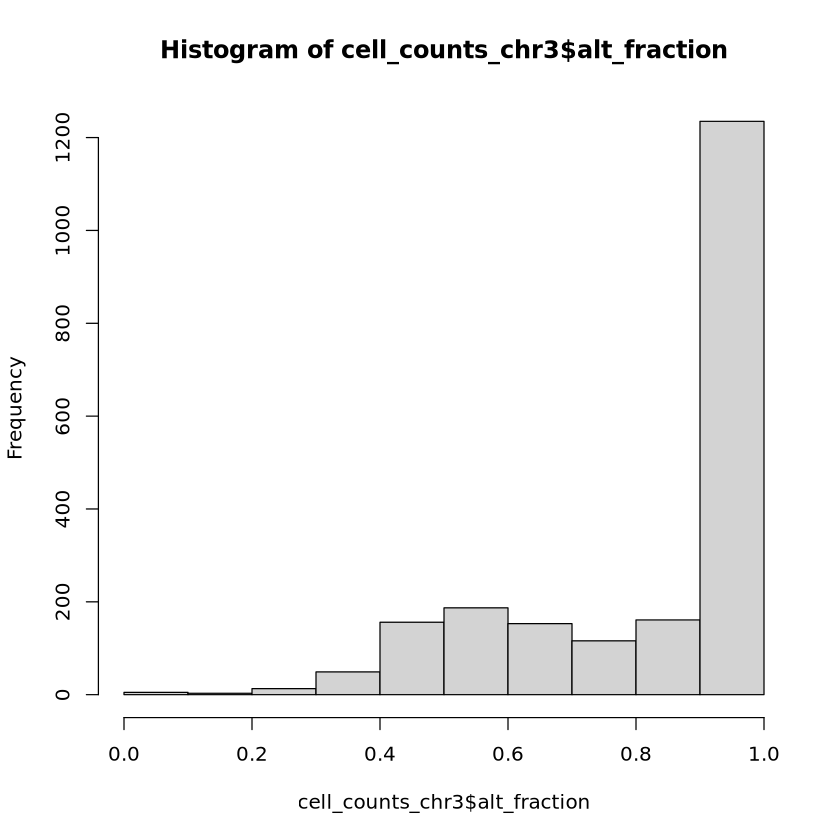

In [18]:
hist(cell_counts_chr3$alt_fraction)

In [19]:
head(cell_counts_chr3, 20)

,cell,ref,alt,total,alt_fraction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCAGGTCCTCCTG,AAACCAGGTCCTCCTG,146,134,280,0.4785714
AAACCAGGTTAGTTGC,AAACCAGGTTAGTTGC,402,441,843,0.5231317
AAACCAGGTTGTTGTA,AAACCAGGTTGTTGTA,0,59,59,1.0000000
AAACCGCCAAATAGCT,AAACCGCCAAATAGCT,34,60,94,0.6382979
AAACCGGTCGCTAGAG,AAACCGGTCGCTAGAG,63,84,147,0.5714286
AAACCGGTCGGTCAAG,AAACCGGTCGGTCAAG,1,177,178,0.9943820
AAACGAACAAAGGAAC,AAACGAACAAAGGAAC,9,264,273,0.9670330
AAACGGGCAAGGCCTG,AAACGGGCAAGGCCTG,0,97,97,1.0000000
AAACGGGCATGAATCG,AAACGGGCATGAATCG,59,157,216,0.7268519


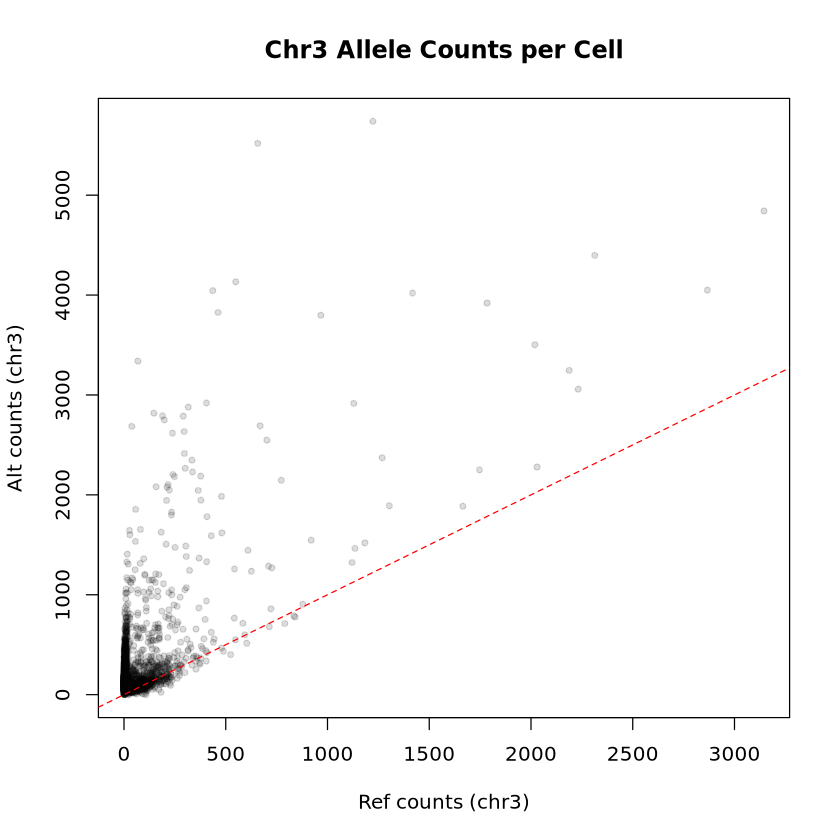

In [20]:
plot(cell_counts_chr3$ref, cell_counts_chr3$alt, pch = 20, col = "#00000022",
     xlab = "Ref counts (chr3)", ylab = "Alt counts (chr3)",
     main = "Chr3 Allele Counts per Cell")
abline(0, 1, col = "red", lty = 2)

In [21]:
# Filter cells with > 0 total chr3 coverage
valid_cells <- cell_counts_chr3$total > 0
cell_counts_chr3_filtered <- cell_counts_chr3[valid_cells, ]

In [ ]:
setwd("/CART_cells_analysis/ascat_chr3/")

In [24]:
table <- cell_counts_chr3_filtered
table$NAME <- "Tumour_cells"
write.table(table, "Allelecounts_tumour_DNA_cell_chr3_Q3.txt", sep ='\t')

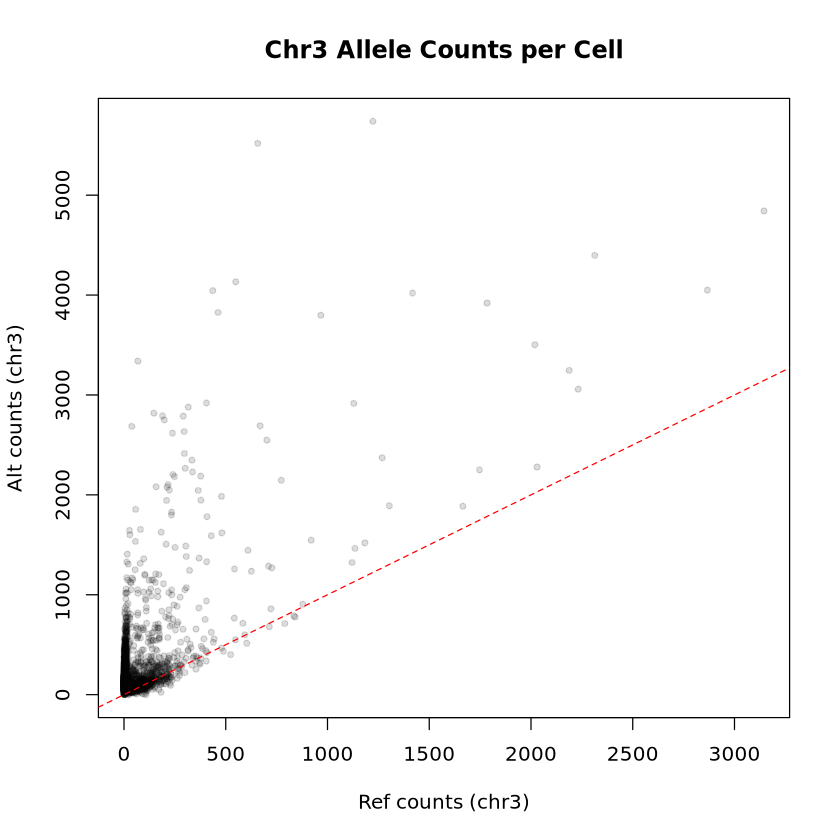

In [25]:
plot(cell_counts_chr3_filtered$ref, cell_counts_chr3_filtered$alt, pch = 20, col = "#00000022",
     xlab = "Ref counts (chr3)", ylab = "Alt counts (chr3)",
     main = "Chr3 Allele Counts per Cell")
abline(0, 1, col = "red", lty = 2)

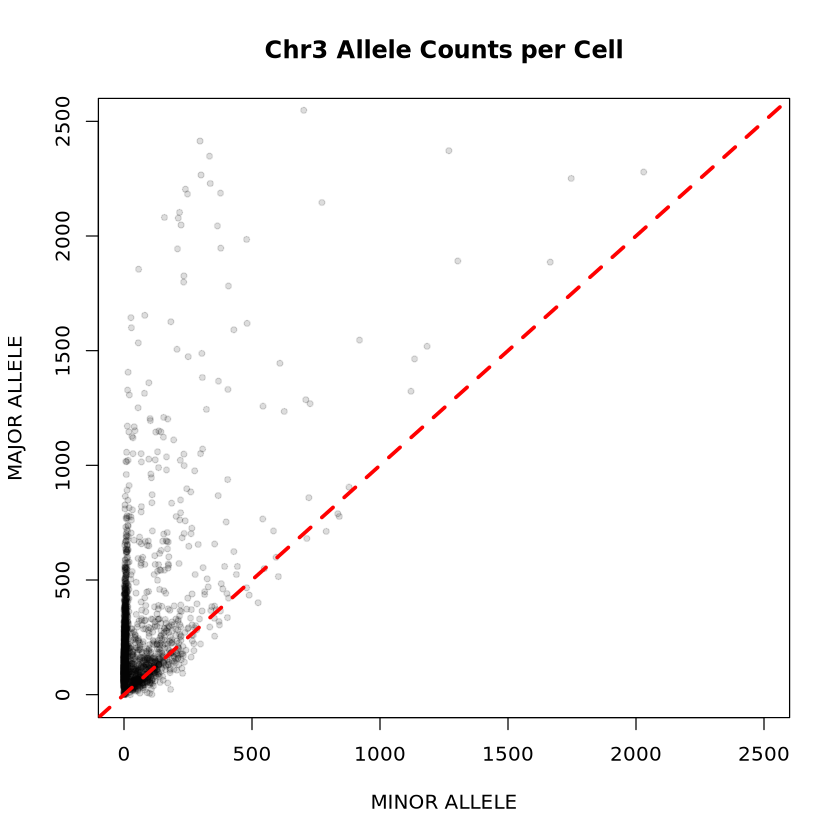

In [26]:
plot(
  cell_counts_chr3_filtered$ref, 
  cell_counts_chr3_filtered$alt, 
  pch = 20, 
  col = "#00000022",
  xlab = "MINOR ALLELE", 
  ylab = "MAJOR ALLELE",
  main = "Chr3 Allele Counts per Cell",
  xlim = c(0, 2500),
  ylim = c(0, 2500)
)
abline(0, 1, col = "red", lty = 2, lwd = 3)


Repeat above analysis for all timpoint and CART 

# After running the above analysis for every tumour timepoint and the CART cells, add them all togheter:

# Downstream analysis

In [ ]:
# Load in the 6 df, merge and re-plot:
#DNA
CART_normal <-  read.delim("Allelecounts_normal_CART_DNA_cell_chr3.txt", sep ='\t')
CART_tumour <- read.delim("Allelecounts_tumour_CART_DNA_cell_chr3.txt", sep ='\t')
tumour_Q3 <- read.delim("Allelecounts_tumour_DNA_cell_chr3_Q3.txt", sep ='\t')

tumour_Q2 <- read.delim("Allelecounts_tumour_DNA_cell_chr3_Q2.txt", sep ='\t')
tumour_Q1 <- read.delim("Allelecounts_tumour_DNA_cell_chr3_Q1.txt", sep ='\t')
tumour_D0 <- read.delim("Allelecounts_tumour_DNA_cell_chr3_D0.txt", sep ='\t')


In [ ]:
#Load in the barcodes, so we only look at the tumour cells of each timepoint and not the "normal" cells
tumour_cells <- read.delim("tumour_cells_barcodes_Q3.txt", header =0 )

In [5]:
tumour_Q3$NAME <- ifelse(tumour_Q3$cell %in% tumour_cells$V1, "Tumour_cells", "normal_cells")

In [ ]:
tumour_cells_Q1 <- read.delim("tumour_cells_barcodes_Q1.txt", header =0 )
tumour_cells_Q2 <- read.delim("tumour_cells_barcodes_Q2.txt", header =0 )
tumour_cells_D0 <- read.delim("tumour_cells_barcodes_D0.txt", header =0 )

In [7]:
tumour_Q2$NAME <- ifelse(tumour_Q2$cell %in% tumour_cells_Q2$V1, "Tumour_cells", "normal_cells")
tumour_Q1$NAME <- ifelse(tumour_Q1$cell %in% tumour_cells_Q1$V1, "Tumour_cells", "normal_cells")
tumour_D0$NAME <- ifelse(tumour_D0$cell %in% tumour_cells_D0$V1, "Tumour_cells", "normal_cells")

In [8]:
tumour_D0$sample <- "D0"
tumour_Q1$sample <- "Q1"
tumour_Q2$sample <- "Q2"
tumour_Q3$sample <- "Q3"

In [9]:
CART_normal$sample <- "Q3"
CART_tumour$sample <- "Q3"


In [10]:
all_DNA <- rbind(CART_normal,CART_tumour,tumour_Q3,tumour_Q2,tumour_Q1,tumour_D0)
head(all_DNA)

,cell,ref,alt,total,alt_fraction,NAME,sample
,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
AACCCGGCAAACGCGT,AACCCGGCAAACGCGT,33,22,55,0.4000000,normal_CART_cells,Q3
ACCCTTAAGGGAGTAA,ACCCTTAAGGGAGTAA,18,13,31,0.4193548,normal_CART_cells,Q3
ACCTCTAAGTCTTAGT,ACCTCTAAGTCTTAGT,46,44,90,0.4888889,normal_CART_cells,Q3
AGGGTTTAGGCTTAAA,AGGGTTTAGGCTTAAA,71,58,129,0.4496124,normal_CART_cells,Q3
ATTGCGTGTTTCCTCA,ATTGCGTGTTTCCTCA,34,5,39,0.1282051,normal_CART_cells,Q3
ATTGGCGAGAGCCGGT,ATTGGCGAGAGCCGGT,114,72,186,0.3870968,normal_CART_cells,Q3


In [11]:
unique(all_DNA$NAME)

[1] "normal_CART_cells" "tumour_CART_cells" "normal_cells"     
[4] "Tumour_cells"

In [12]:
 full <- all_DNA

In [13]:
unique(full$NAME)

[1] "normal_CART_cells" "tumour_CART_cells" "normal_cells"     
[4] "Tumour_cells"

Warning message:
“Removed 54 rows containing missing values or values outside the scale range
(`geom_point()`).”


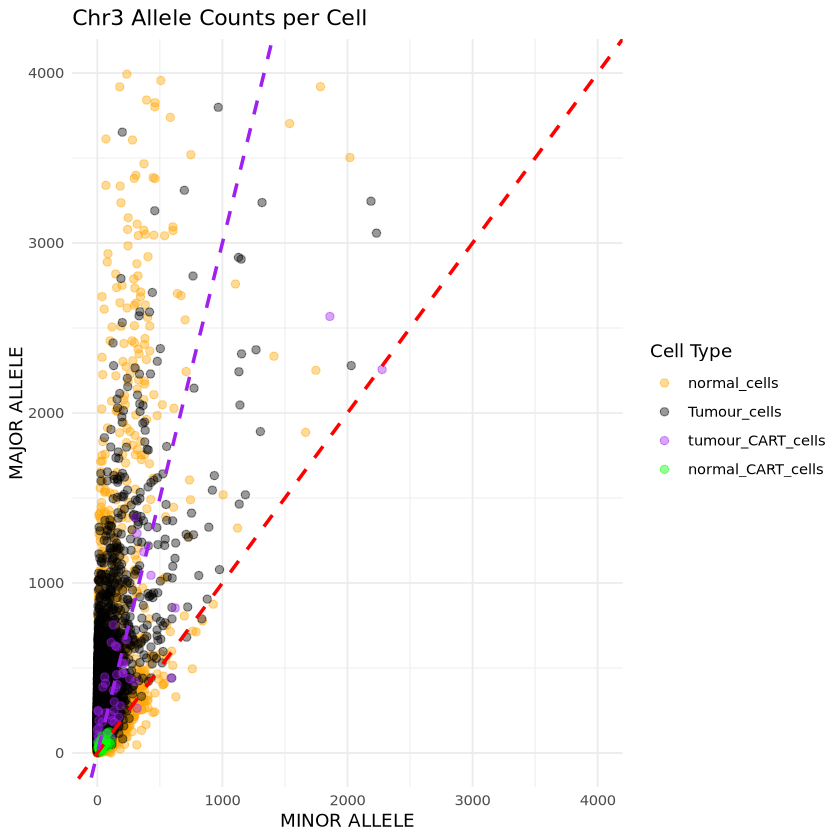

In [14]:
# Set factor levels in desired plotting order
full$NAME <- factor(full$NAME, levels = c("normal_cells","Tumour_cells", "tumour_CART_cells", "normal_CART_cells"))

# Reorder data frame to plot tumour cells first, then CART, then normal last (so normal is on top)
full <- full[order(full$NAME), ]

custom_colors <- c("orange", "black", "purple", "green")
names(custom_colors) <- levels(full$NAME)

ggplot(full, aes(x = ref, y = alt, color = NAME)) +
  geom_point(size = 2, alpha = 0.4) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed", linewidth = 1) +
  geom_abline(slope = 3/1, intercept = 0, color = "purple", linetype = "dashed", linewidth = 1) +
  scale_color_manual(values = custom_colors) +
  labs(
    title = "Chr3 Allele Counts per Cell",
    x = "MINOR ALLELE",
    y = "MAJOR ALLELE",
    color = "Cell Type"
  ) +
  xlim(0, 4000) +
  ylim(0, 4000) +
  theme_minimal()

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


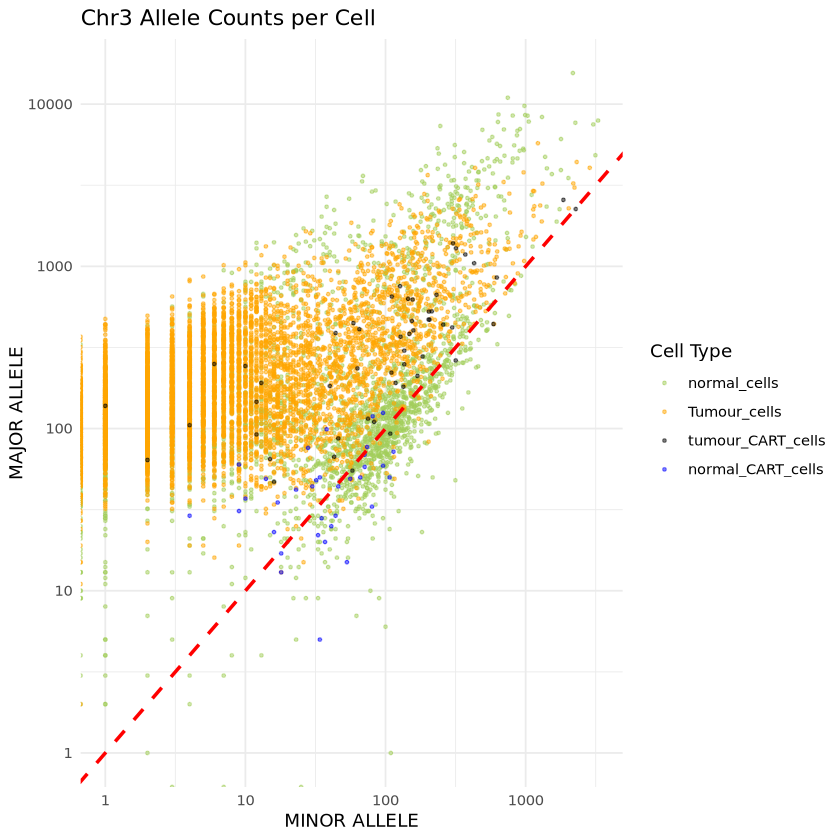

In [15]:
# Reorder data frame to plot tumour cells first, then CART, then normal last (so normal is on top)
full <- full[order(full$NAME), ]

custom_colors <- c("darkolivegreen3","orange", "black", "blue")
names(custom_colors) <- levels(full$NAME)

ggplot(full, aes(x = ref, y = alt, color = NAME)) +
  geom_point(size = 0.7, alpha = 0.5) +
  scale_x_log10() +
  scale_y_log10() + 
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed", linewidth = 1) +
  scale_color_manual(values = custom_colors) +
  labs(
    title = "Chr3 Allele Counts per Cell",
    x = "MINOR ALLELE",
    y = "MAJOR ALLELE",
    color = "Cell Type"
  ) +
  theme_minimal()

  #https://ggplot2.tidyverse.org/reference/annotation_logticks.html

In [17]:
# Set PDF output
pdf("Chr3_Allele_Counts.pdf", width = 6, height = 5)

# Plot
ggplot(full, aes(x = ref, y = alt, color = NAME)) +
  geom_point(size = 0.7, alpha = 0.5) +
  scale_x_log10() +
  scale_y_log10() + 
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed", linewidth = 1) +
  scale_color_manual(values = custom_colors) +
  labs(
    title = "Chr3 Allele Counts per Cell",
    x = "MINOR ALLELE",
    y = "MAJOR ALLELE",
    color = "Cell Type"
  ) +
  theme_minimal()

# Close PDF device
dev.off()

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


pdf 
  2

In [18]:
getwd()

[1] "/lustre1/project/stg_00096/home/projects/2023_Cools_B-ALL/FINAL_DNA_ANALYSIS/CART_cells_analysis"

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


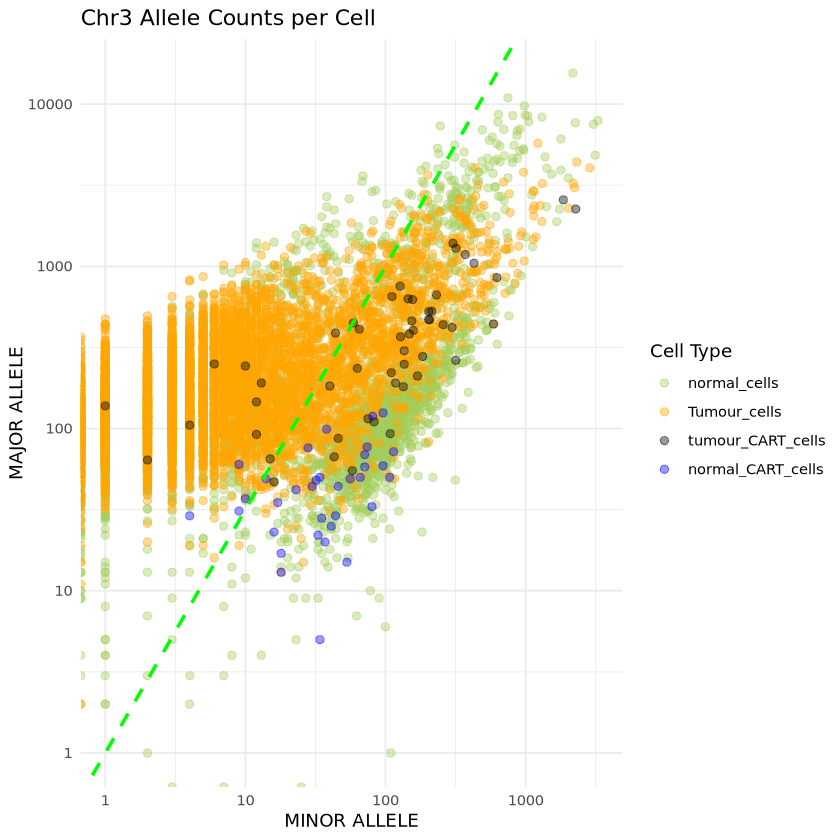

In [19]:
# Reorder data frame to plot tumour cells first, then CART, then normal last (so normal is on top)
full <- full[order(full$NAME), ]

custom_colors <- c("darkolivegreen3","orange", "black", "blue")
names(custom_colors) <- levels(full$NAME)

ggplot(full, aes(x = ref, y = alt, color = NAME)) +
  geom_point(size = 2, alpha = 0.4) +
  scale_x_log10() +
  scale_y_log10() + 
  geom_abline(slope = 1.5, intercept = 0, color = "green", linetype = "dashed", linewidth = 1) +
  scale_color_manual(values = custom_colors) +
  labs(
    title = "Chr3 Allele Counts per Cell",
    x = "MINOR ALLELE",
    y = "MAJOR ALLELE",
    color = "Cell Type"
  ) +
  theme_minimal()

In [ ]:
# Make a Log2 value of each -> log ratio -> use for doublet detection:
full$log_ratio <- log2((full$alt +1)/(full$ref+1))

In [93]:
getwd()

[1] "/lustre1/project/stg_00096/home/projects/2023_Cools_B-ALL/FINAL_DNA_ANALYSIS/CART_cells_analysis"

In [94]:
nrow(full)

[1] 8757

In [95]:
write.table(full, "DNA_tumour_like_state_chr3.txt", sep ='\t')